# Dataset from Kiva.org - World Poverty and Micro-lending

This dataset is from __[Kiva.org](https://www.kiva.org/)__, a company which allows anyone with an account to donate small amounts of money as microloans to those in underserved areas.  The dataset below was found on __[Kaggle](https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding)__ and was part of a contest encouraging people to use the data in order to find insights on their assessments of poverty levels and the context in which these microloans were in operation. This notebook will examine the dataset and then look at ways further experimentation could be set up to monitor and further the efficacy and impact of such loans as time moves forward. 

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Editing the frames a bit so that we only work with the columns we need and have them renamed nicely.
main = pd.read_csv('kiva_loans.csv').drop(['country_code', 'currency', 'lender_count', 'tags'], axis = 1)
mpi = pd.read_csv('kiva_mpi_region_locations.csv').drop(['country', 'region', 'lat', 'lon'], axis = 1 )
sector = pd.read_csv('loan_theme_ids.csv')
region_themes = pd.read_csv('loan_themes_by_region.csv').drop(['LocationName', 'ISO', 'Partner ID','Loan Theme ID', 
                                                            'country', 'forkiva','region', 'geocode_old', 'number',
                                                            'geocode', 'lat', 'lon','mpi_region', 'mpi_geo', 
                                                            'rural_pct'], axis = 1)

In [18]:
# Merging the frames:
beta = main.merge(sector, how = 'outer', on = 'id')
delta = mpi.merge(region_themes, how = 'left', on = 'geo')

Using the describe method here is a little odd since a lot of the numeric values refer to ID's and reference numbers. It might be helpful regarding the amount though as the analysis moves on. 

http://ophi.org.uk/multidimensional-poverty-index/

In [19]:
# Looking at the initial data...
beta.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,Partner ID
count,7.790980e+05,671205.000000,671205.000000,657698.000000,671205.000000,764279.000000
mean,1.047473e+06,785.995061,842.397107,178.199616,13.739022,180.825840
std,2.282553e+05,1130.398941,1198.660073,94.247581,8.598919,97.914029
min,6.386310e+05,0.000000,25.000000,9.000000,1.000000,9.000000
25%,8.499732e+05,250.000000,275.000000,126.000000,8.000000,126.000000
50%,1.046526e+06,450.000000,500.000000,145.000000,13.000000,145.000000
75%,1.244768e+06,900.000000,1000.000000,204.000000,14.000000,204.000000
max,1.444243e+06,100000.000000,100000.000000,536.000000,158.000000,557.000000


In [20]:
delta.describe()

,MPI,amount
count,192186.000000,3.899754e+06
mean,0.217516,5.574129e+03
std,0.197479,2.829674e+04
min,0.000000,5.000000e+01
25%,0.039000,6.500000e+02
50%,0.146000,1.300000e+03
75%,0.397000,2.950000e+03
max,0.744000,3.080975e+06


In [21]:
beta.keys()

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country', 'region', 'partner_id', 'posted_time', 'disbursed_time',
       'funded_time', 'term_in_months', 'borrower_genders',
       'repayment_interval', 'date', 'Loan Theme ID', 'Loan Theme Type',
       'Partner ID'],
      dtype='object')

In [22]:
delta.keys()

Index(['LocationName', 'ISO', 'world_region', 'MPI', 'geo',
       'Field Partner Name', 'sector', 'Loan Theme Type', 'amount', 'names'],
      dtype='object')

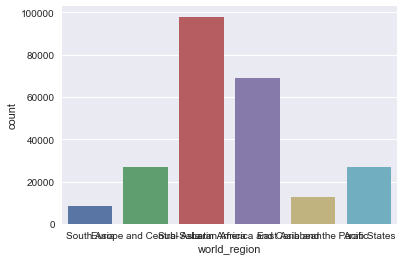

In [23]:
sns.countplot(x = 'world_region', data = delta)